# HR Analytics

Introduction:

Objectives:

This case study aims to model the probability of attrition of each employee from the HR Analytics Dataset. Its conclusions will allow the management to understand which factors urge the employees to leave the company and which changes should be made to avoid their departure.

Target:
    Left column

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# GETTING THE DATASET

In [2]:
df=pd.read_csv('HR_Analytics.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# EDA

In [3]:
df.shape

(14999, 10)

In [4]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
df['left']

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [8]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

# CHECKING FOR DUPLICATES AND REMOVING THEM

In [9]:
df['satisfaction_level'].duplicated().sum()

14907

In [10]:
df['last_evaluation'].duplicated().sum()

14934

In [11]:
df['number_project'].duplicated().sum()

14993

In [12]:
df['average_montly_hours'].duplicated().sum()

14784

In [13]:
df['time_spend_company'].duplicated().sum()

14991

In [14]:
df['Work_accident'].duplicated().sum()

14997

In [15]:
df['left'].duplicated().sum()

14997

In [16]:
df['promotion_last_5years'].duplicated().sum()

14997

In [17]:
df['sales'].duplicated().sum()

14989

In [18]:
df['salary'].duplicated().sum()

14996

In [19]:
df1=df.drop_duplicates()
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [20]:
df1.duplicated().sum()

0

In [21]:
df1.shape

(11991, 10)

In [22]:
df1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

# CONVERTING OBJECT DATA INTO FLOAT DATA

In [23]:
from sklearn.preprocessing import OrdinalEncoder
ordin=OrdinalEncoder()

In [24]:
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=ordin.fit_transform(df1[i].values.reshape(-1,1))

In [25]:
df1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                    float64
salary                   float64
dtype: object

# CONVERTING FLOAT DATA INTO INTEGERS

In [26]:
for i in df1.columns:
    if df1[i].dtypes=='float':
        df1[i]=df1[i].astype('int')  

In [27]:
df1.dtypes

satisfaction_level       int32
last_evaluation          int32
number_project           int64
average_montly_hours     int64
time_spend_company       int64
Work_accident            int64
left                     int64
promotion_last_5years    int64
sales                    int32
salary                   int32
dtype: object

In [28]:
df1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

AFTER GETTING THE DATASET WITH A SAME DATATYPE AND WITH NO NULL DATAS WE PROCEED TO DATA VISUALISATIOMN

# DATA VISUALIZATION

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='left'>

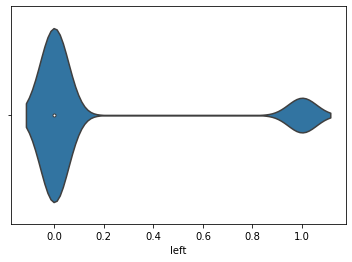

In [30]:
sns.violinplot(df1['left'])

In [31]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

<AxesSubplot:xlabel='satisfaction_level', ylabel='left'>

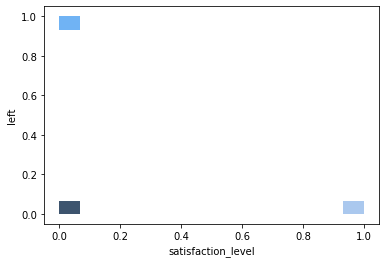

In [32]:
sns.histplot(data=df1,x='satisfaction_level',y='left')

this denotes the proportionate between satisfaction_level and the employees left .

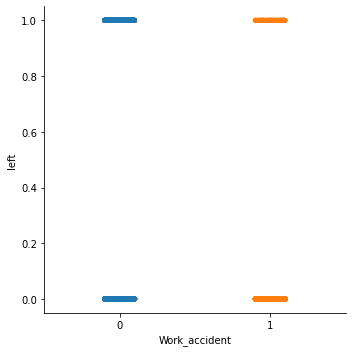

In [35]:
sns.catplot(data=df1,x='Work_accident',y='left')

This shows the relation between work_accident and the employees left

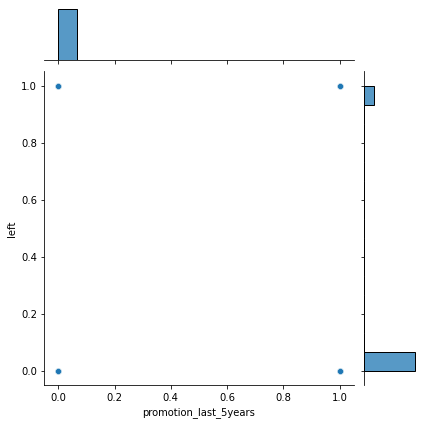

In [36]:
sns.jointplot(data=df1,x='promotion_last_5years',y='left')

<AxesSubplot:ylabel='Count'>

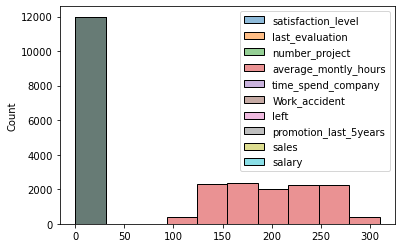

In [37]:
sns.histplot(data=df1,bins=10)

This gives a vague picture of the entire dataset

# DATA CLENSING

In [39]:
df1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.008340,0.016679,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,5.871153,1.356184
std,0.090944,0.128072,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,2.899022,0.628071
min,0.000000,0.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,0.000000,0.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,0.000000,0.000000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


Number_project and sales have median more than mean so they have left skewed data.
Number_project ,average_montly_hours,time_spend_company and sales have max more than their 75% so they right skewed data

In [40]:
df1.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,-0.004783,0.003717,-0.002322,-0.013434,0.003990,-0.040919,0.002183,0.012301,0.009318
last_evaluation,-0.004783,1.000000,0.042788,0.037825,0.068062,-0.012361,0.106383,-0.001948,0.001296,0.016344
number_project,0.003717,0.042788,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.010101,0.003199
average_montly_hours,-0.002322,0.037825,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.000623,0.002727
time_spend_company,-0.013434,0.068062,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,-0.017806,0.000369
Work_accident,0.003990,-0.012361,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,0.006560,-0.003654
left,-0.040919,0.106383,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,0.018286,0.004224
promotion_last_5years,0.002183,-0.001948,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,-0.023826,0.004832
sales,0.012301,0.001296,0.010101,0.000623,-0.017806,0.006560,0.018286,-0.023826,1.000000,0.006702
salary,0.009318,0.016344,0.003199,0.002727,0.000369,-0.003654,0.004224,0.004832,0.006702,1.000000


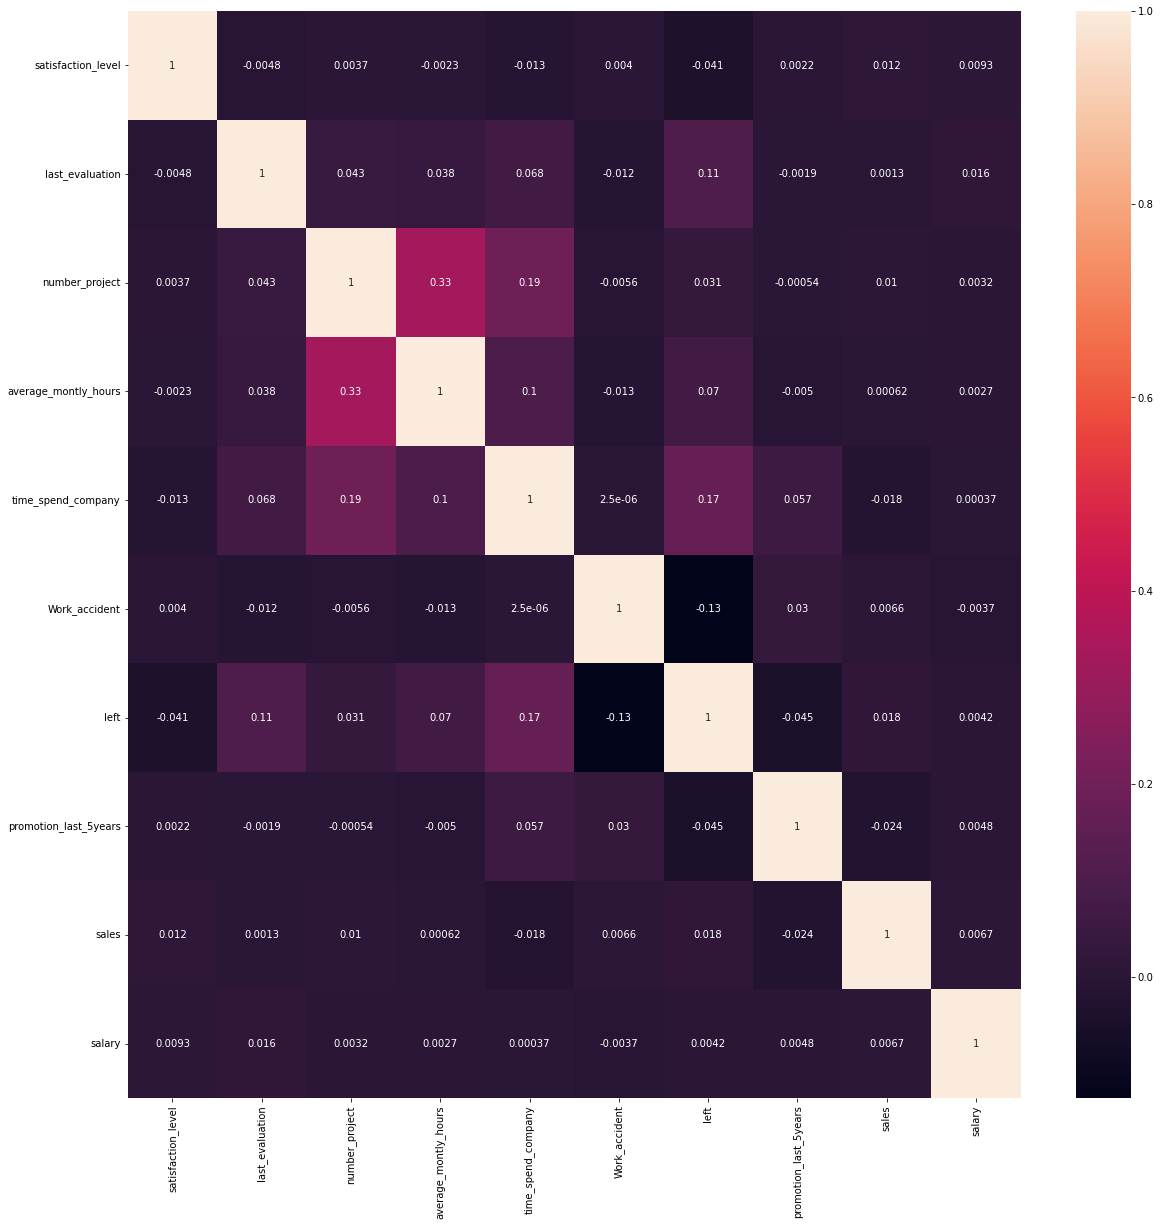

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)
plt.show()

<AxesSubplot:>

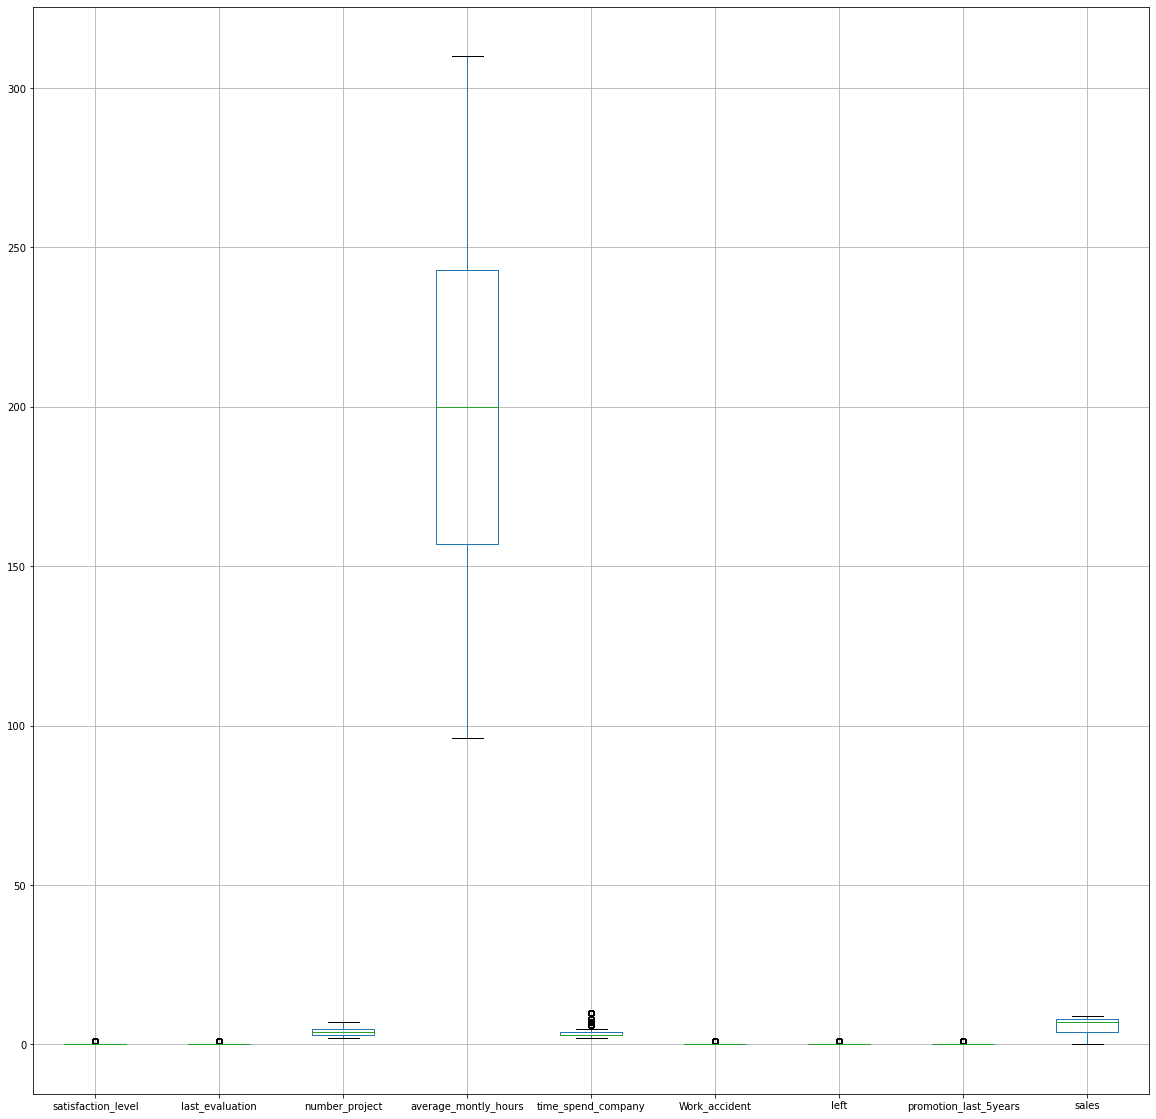

In [42]:
df1.iloc[:,0:-1].boxplot(figsize=(20,20))

Many columns have outliers

In [43]:
df1.skew()

satisfaction_level       10.814234
last_evaluation           7.548922
number_project            0.332152
average_montly_hours      0.027208
time_spend_company        1.816577
Work_accident             1.914410
left                      1.795135
promotion_last_5years     7.490008
sales                    -0.822811
salary                   -0.446049
dtype: float64

# REMOVING OUTLIERS

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(df1))

In [45]:
dfnew=df1[(z<3).all(axis=1)]
dfnew.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0,0,2,157,3,0,1,0,7,1
1,0,0,5,262,6,0,1,0,7,2
2,0,0,7,272,4,0,1,0,7,2
3,0,0,5,223,5,0,1,0,7,1
4,0,0,2,159,3,0,1,0,7,1


In [46]:
dfnew.skew()

satisfaction_level       0.000000
last_evaluation          0.000000
number_project           0.343081
average_montly_hours     0.038554
time_spend_company       0.981576
Work_accident            1.940574
left                     1.786392
promotion_last_5years    0.000000
sales                   -0.834578
salary                  -0.427136
dtype: float64

SKEW IS REMOVED

# SPLITTING X (INPUT VARIABLE) AND Y (OUTPUT VARIABLE)

In [47]:
x=dfnew.drop('left',axis=1)
y=dfnew['left']

In [48]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0,0,2,157,3,0,0,7,1
1,0,0,5,262,6,0,0,7,2
2,0,0,7,272,4,0,0,7,2
3,0,0,5,223,5,0,0,7,1
4,0,0,2,159,3,0,0,7,1


In [49]:
x.shape

(11321, 9)

In [50]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [51]:
y.shape

(11321,)

# BALANCING X AND Y

In [52]:
from sklearn.preprocessing import power_transform

In [53]:
newx=power_transform(x)
dfx=pd.DataFrame(data=newx,columns=x.columns)
dfx.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.0,0.0,-1.695842,-0.875853,-0.038580,-0.423114,0.0,0.315854,-0.640705
1,0.0,0.0,1.028000,1.240185,1.906913,-0.423114,0.0,0.315854,1.072469
2,0.0,0.0,2.338080,1.427400,0.839018,-0.423114,0.0,0.315854,1.072469
3,0.0,0.0,1.028000,0.489263,1.451929,-0.423114,0.0,0.315854,-0.640705
4,0.0,0.0,-1.695842,-0.832318,-0.038580,-0.423114,0.0,0.315854,-0.640705


In [54]:
dfx.shape

(11321, 9)

In [55]:
y.value_counts()

0    9431
1    1890
Name: left, dtype: int64

<AxesSubplot:xlabel='left', ylabel='count'>

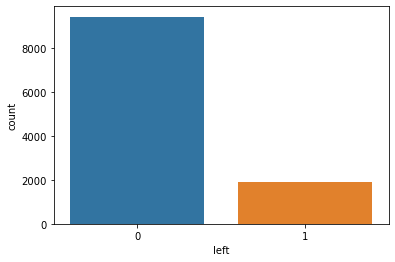

In [56]:
sns.countplot(y)

In [57]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
xnew,ynew=smt.fit_resample(dfx,y)

In [58]:
ynew.value_counts()

1    9431
0    9431
Name: left, dtype: int64

<AxesSubplot:xlabel='left', ylabel='count'>

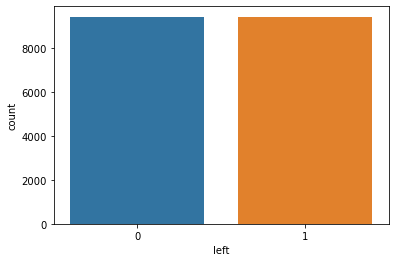

In [59]:
sns.countplot(ynew)

# TRAINING AND TESTING

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [61]:
maxAcc=0
maxRS=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(xnew,ynew,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    score=accuracy_score(y_test,predlr)
    print('Accuracy_score of LogisticRegression ' ,score, 'at random_state ' ,i)
    if score > maxAcc:
        maxAcc=score
        maxRS=i
    print('Mac acc score of lr ' ,maxAcc*100, 'at random_state ' ,maxRS) 

Accuracy_score of LogisticRegression  0.7805459846276173 at random_state  0
Mac acc score of lr  78.05459846276173 at random_state  0
Accuracy_score of LogisticRegression  0.7765703684071031 at random_state  1
Mac acc score of lr  78.05459846276173 at random_state  0
Accuracy_score of LogisticRegression  0.7723297111052213 at random_state  2
Mac acc score of lr  78.05459846276173 at random_state  0
Accuracy_score of LogisticRegression  0.7741849986747946 at random_state  3
Mac acc score of lr  78.05459846276173 at random_state  0
Accuracy_score of LogisticRegression  0.7641134375828253 at random_state  4
Mac acc score of lr  78.05459846276173 at random_state  0
Accuracy_score of LogisticRegression  0.7945931619401008 at random_state  5
Mac acc score of lr  79.45931619401007 at random_state  5
Accuracy_score of LogisticRegression  0.7731248343493241 at random_state  6
Mac acc score of lr  79.45931619401007 at random_state  5
Accuracy_score of LogisticRegression  0.7755102040816326 at ra

In [62]:
x_train,x_test,y_train,y_test=train_test_split(xnew,ynew,test_size=0.20,random_state=496)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
score=accuracy_score(predlr,y_test)
print('Accuracy_score of LogisticRegression ' ,score*100)
print(confusion_matrix(predlr,y_test))
print(classification_report(predlr,y_test))

Accuracy_score of LogisticRegression  79.93639014047177
[[1313  237]
 [ 520 1703]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78      1550
           1       0.88      0.77      0.82      2223

    accuracy                           0.80      3773
   macro avg       0.80      0.81      0.80      3773
weighted avg       0.81      0.80      0.80      3773



# TUNING OF LOGISTICREGRESSION

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
lr=LogisticRegression()
parameters={'C':[100,10,1,0.1,0.01]}
gscvlr=GridSearchCV(estimator=lr,param_grid=parameters)
gscvlr.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01]})

In [65]:
print(gscvlr.best_params_)

{'C': 0.01}


In [66]:
lr1=LogisticRegression(C=0.01)
lr1.fit(x_train,y_train)
predlr1=lr1.predict(x_test)
print('Accuracy_score ' ,accuracy_score(y_test,predlr1)*100)

Accuracy_score  79.9893983567453


In [67]:
lr1=LogisticRegression(C=0.1)
lr1.fit(x_train,y_train)
predlr1=lr1.predict(x_test)
print('Accuracy_score ' ,accuracy_score(y_test,predlr1)*100)

Accuracy_score  79.96289424860854


In [68]:
lr1=LogisticRegression(C=1)
lr1.fit(x_train,y_train)
predlr1=lr1.predict(x_test)
print('Accuracy_score ' ,accuracy_score(y_test,predlr1)*100)

Accuracy_score  79.93639014047177


In [69]:
lr1=LogisticRegression(C=10)
lr1.fit(x_train,y_train)
predlr1=lr1.predict(x_test)
print('Accuracy_score ' ,accuracy_score(y_test,predlr1)*100)

Accuracy_score  79.93639014047177


In [70]:
lr1=LogisticRegression(C=100)
lr1.fit(x_train,y_train)
predlr1=lr1.predict(x_test)
print('Accuracy_score ' ,accuracy_score(y_test,predlr1)*100)

Accuracy_score  79.93639014047177


SINCE ACCURACY SEEMS LOW , WE CAN TRY FOR MORE MODELS 

# COMPARING MORE MODELS

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
knc=KNeighborsClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
etc=ExtraTreesClassifier()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
svc=SVC()

In [72]:
model=[knc,gbc,abc,etc,rfc,dtc,svc]
for i in model:
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('Accuracy_score of model ' , i ,'is = ' ,accuracy_score(y_test,predi)*100)

Accuracy_score of model  KNeighborsClassifier() is =  94.59316194010071
Accuracy_score of model  GradientBoostingClassifier() is =  95.20275642724623
Accuracy_score of model  AdaBoostClassifier() is =  91.99575934269811
Accuracy_score of model  ExtraTreesClassifier() is =  96.18340842830638
Accuracy_score of model  RandomForestClassifier() is =  96.42194540153723
Accuracy_score of model  DecisionTreeClassifier() is =  95.12324410283594
Accuracy_score of model  SVC() is =  92.92340312748476


# CROSS_VALIDATION

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
 for i in range(2,10):
        models=[knc,gbc,abc,etc,rfc,dtc,svc]
        for j in models:
            j.fit(x_train,y_train)
            predj=j.predict(x_test)
            score=accuracy_score(y_test,predj)
            cross=cross_val_score(j,x_train,y_train,cv=i)
    
            print('Accuracy_score of model ' ,j, 'is equal == ' ,score*100)
            print('Cross validation of model ' ,j, 'is equal == ' ,cross.mean(),'at cv = ' ,i)
            print('Diff between accuracy_score and cross validation of model ' ,j, 'is equal == ' , score-(cross.mean()))

Accuracy_score of model  KNeighborsClassifier() is equal ==  94.59316194010071
Cross validation of model  KNeighborsClassifier() is equal ==  0.9350519101720536 at cv =  2
Diff between accuracy_score and cross validation of model  KNeighborsClassifier() is equal ==  0.010879709228953538
Accuracy_score of model  GradientBoostingClassifier() is equal ==  95.20275642724623
Cross validation of model  GradientBoostingClassifier() is equal ==  0.9553978971698265 at cv =  2
Diff between accuracy_score and cross validation of model  GradientBoostingClassifier() is equal ==  -0.0033703328973642144
Accuracy_score of model  AdaBoostClassifier() is equal ==  91.99575934269811
Cross validation of model  AdaBoostClassifier() is equal ==  0.9196103601087009 at cv =  2
Diff between accuracy_score and cross validation of model  AdaBoostClassifier() is equal ==  0.00034723331828023785
Accuracy_score of model  ExtraTreesClassifier() is equal ==  96.31592896899019
Cross validation of model  ExtraTreesClas

COMPARING ALL MODELS WITH  LESS DIFFERENCE BETWEEN ACCURACY AND CROSS_VALIDATION, WE FIND EXTRA TREES CLASSIFIER, RANDOM FOREST CLASSIFIER, SVC to show better accuracies

# HYPERTUNING

In [75]:
from sklearn.model_selection import GridSearchCV

# ETC TUNING

In [76]:
parameters={'n_estimators':[50,100,150,200],
            'criterion':['gini','squared_error'],
            'max_depth':[1,2,3],
            'max_features':['auto','sqrt','log2']}
gscv_etc=GridSearchCV(estimator=etc,param_grid=parameters)
gscv_etc.fit(x_train,y_train)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'squared_error'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [77]:
print(gscv_etc.best_score_)
print(gscv_etc.best_params_)
print(gscv_etc.best_estimator_)

0.9046990842482394
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 200}
ExtraTreesClassifier(max_depth=3, max_features='auto', n_estimators=200)


# RFC TUNING

In [78]:
parameters={'n_estimators':[50,100,150,200],
            'criterion':['gini','squared_error'],
            'max_depth':[1,2,3],
            'max_features':['auto','sqrt','log2']}
gscv_rfc=GridSearchCV(estimator=rfc,param_grid=parameters)
gscv_rfc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'squared_error'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [79]:
print(gscv_rfc.best_score_)
print(gscv_rfc.best_params_)
print(gscv_rfc.best_estimator_)

0.9096695706876847
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50}
RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=50)


# SVC TUNING

In [80]:
svc=SVC()
kernel_value={'kernel':['rbf','linear','poly']}

In [81]:
gscv_svc=GridSearchCV(estimator=svc,param_grid=kernel_value)
gscv_svc.fit(x_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['rbf', 'linear', 'poly']})

In [82]:
print(gscv_svc.best_score_)
print(gscv_svc.best_estimator_)
print(gscv_svc.best_params_)

0.9276292965881652
SVC()
{'kernel': 'rbf'}


# FINALLY WE CONCLUDE THAT RANDOM FOREST CLASSIFIER IS THE BEST FITTING MODEL

# ROC_AUC_CURVE

In [83]:
from sklearn.metrics import roc_curve

In [84]:
fpr,tpr,thresholds=roc_curve(y_test,rfc.predict(x_test))

In [85]:
fpr

array([0.        , 0.03436989, 1.        ])

In [86]:
tpr

array([0.       , 0.9628866, 1.       ])

In [87]:
thresholds

array([2, 1, 0], dtype=int64)

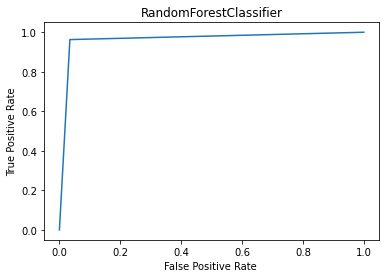

In [88]:
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel("False Positive Rate ")
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier')
plt.show()

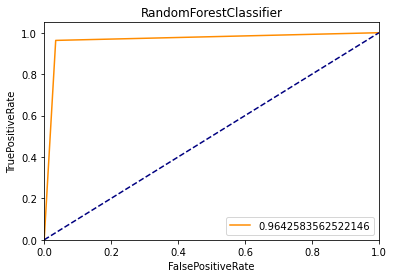

In [89]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,rfc.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',label=roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()

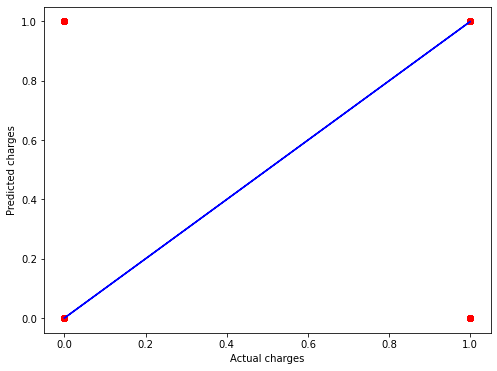

In [90]:
plt.figure(figsize=(8,6))
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.scatter(x=y_test,y=rfc.predict(x_test),color='r')
plt.plot(y_test,y_test,color='b')
plt.savefig('=rfc.png')
plt.show()

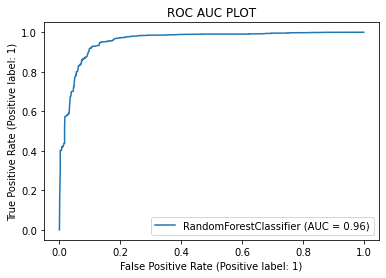

In [91]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gscv_rfc.best_estimator_,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

# SAVING THE BEST MODEL

In [92]:
import pickle

In [93]:
filename='HR_Analytics.pkl'

In [94]:
pickle.dump(gscv_rfc.best_estimator_,open(filename,'wb'))

# LOAD THE BEST model

In [95]:
pickle.load(open(filename,'rb'))

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=50)